<a href="https://colab.research.google.com/github/Akshar-code/Vizag-Pollutant-Forecasting/blob/main/Pollutant_forecasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/Weather Forecasting Images

[Errno 2] No such file or directory: '/content/drive/MyDrive/Weather Forecasting Images'
/content


In [ ]:
ls

'BEST OUTGOING STUDENT _ APPLICATION- AKSHAR KOTTUVADA'/
'Business Model Canvas Template.gslides'
'Colab Notebooks'/
 Coursera_certifications/
'Final Twitter Data'/
'Investment Calculator.xlsx'
'JHU Housing.gsheet'
 Mathworks_certifications/
 NPTEL_certifications/
'Tableau DATA VISUALISATION CHALLENGE'/
'Year Wise Data'/


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
df=pd.read_csv('pollution.csv')

In [ ]:
df.head()

,From Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Temp,RH,WS,Xylene
0,01/07/17 0:00,34.45,58.86,3.33,16.91,11.45,5.12,34.78,1.38,62.20,3.59,8.32,42.54,81.47,1.76,2.53
1,02/07/17 0:00,40.48,110.71,3.01,15.35,10.61,3.81,13.97,1.12,9.77,3.47,9.02,27.06,79.99,1.92,2.08
2,03/07/17 0:00,42.87,105.22,3.39,19.65,13.20,4.40,31.77,0.31,13.50,3.99,11.21,27.20,76.49,1.81,3.03
3,04/07/17 0:00,46.26,123.44,3.19,16.26,11.23,4.98,31.88,0.00,15.14,4.86,12.12,27.67,71.53,1.84,2.90
4,05/07/17 0:00,49.75,128.45,3.62,16.90,11.91,4.65,31.36,0.00,14.31,4.11,12.94,27.41,68.27,1.68,2.60


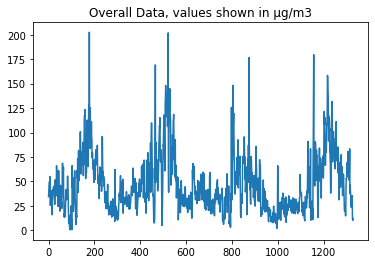

In [ ]:
df1=df.reset_index()['PM10']
plt.title('Overall Data, values shown in μg/m3')
plt.plot(df1)
plt.savefig('PM/Overall data.png')

In [ ]:
#Normalisation
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.16821736]
 [0.19805998]
 [0.20988815]
 ...
 [0.06176383]
 [0.04795605]
 [0.05899238]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.90)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(1196, 133)

In [ ]:
train_data

array([[0.16821736],
       [0.19805998],
       [0.20988815],
       ...,
       [0.2883302 ],
       [0.27536375],
       [0.32510146]])

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1095, 100)
(1095,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(32, 100)
(32,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 10s 248ms/step - loss: 0.0351 - val_loss: 0.0122
Epoch 2/100
18/18 [==============================] - 3s 189ms/step - loss: 0.0133 - val_loss: 0.0127
Epoch 3/100
18/18 [==============================] - 3s 185ms/step - loss: 0.0130 - val_loss: 0.0138
Epoch 4/100
18/18 [==============================] - 3s 190ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 5/100
18/18 [==============================] - 3s 187ms/step - loss: 0.0114 - val_loss: 0.0125
Epoch 6/100
18/18 [==============================] - 3s 193ms/step - loss: 0.0118 - val_loss: 0.0123
Epoch 7/100
18/18 [==============================] - 3s 193ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 8/100
18/18 [==============================] - 3s 192ms/step - loss: 0.0112 - val_loss: 0.0114
Epoch 9/100
18/18 [==============================] - 4s 195ms/step - loss: 0.0105 - val_loss: 0.0118
Epoch 10/100
18/18 [==============================] - 4s 199ms/step - loss: 0.0130 - val_l

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(y_train,train_predict))

52.85305659048986

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

51.654545088622676

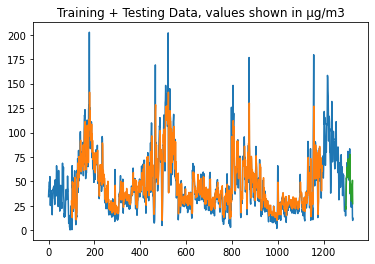

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Training + Testing Data, values shown in μg/m3')
plt.savefig('PM2.5/Training+Testing_Data.png')
plt.show()

In [ ]:
len(test_data)

133

In [ ]:
x_input=test_data[33:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.35568642977333464,
 0.3098584578837969,
 0.1861328318321291,
 0.23760269226962288,
 0.3297535385529051,
 0.5122735821043255,
 0.4984163119865387,
 0.6499059685242008,
 0.3805800257349302,
 0.4036424824309611,
 0.3440562209244779,
 0.35712164703553406,
 0.41096703949321983,
 0.4113629614965852,
 0.49881223398990404,
 0.45654756013065423,
 0.4603583094130457,
 0.39963377214688706,
 0.4467979807977828,
 0.33688013461348115,
 0.30886865287538356,
 0.3435613184202712,
 0.4021082846679204,
 0.3817183014946056,
 0.43274274967831344,
 0.3564287835296447,
 0.5477580916559438,
 0.4020587944174998,
 0.3940908640997724,
 0.3500445412253786,
 0.37281005641888554,
 0.3669207166188261,
 0.35078689498168864,
 0.2899633772146887,
 0.4197268138176779,
 0.3845887360190043,
 0.36212016232802136,
 0.2681381767791745,
 0.15213302979313076,
 0.19929723844402653,
 0.20894783727605662,
 0.2652182520043551,
 0.3394041373849352,
 0.2872909036919727,
 0.2561615361773731,
 0.21632188458873602,
 0.24532317133524

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=2)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=2)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

1/1 - 0s
[0.15712199]
101
1 day input [0.30985846 0.18613283 0.23760269 0.32975354 0.51227358 0.49841631
 0.64990597 0.38058003 0.40364248 0.34405622 0.35712165 0.41096704
 0.41136296 0.49881223 0.45654756 0.46035831 0.39963377 0.44679798
 0.33688013 0.30886865 0.34356132 0.40210828 0.3817183  0.43274275
 0.35642878 0.54775809 0.40205879 0.39409086 0.35004454 0.37281006
 0.36692072 0.35078689 0.28996338 0.41972681 0.38458874 0.36212016
 0.26813818 0.15213303 0.19929724 0.20894784 0.26521825 0.33940414
 0.2872909  0.25616154 0.21632188 0.24532317 0.25893299 0.38077799
 0.29639711 0.25759675 0.30634465 0.31916262 0.25319212 0.17366129
 0.22770464 0.28357913 0.25289518 0.27813521 0.22725923 0.17084034
 0.10803722 0.09551618 0.09660497 0.09670395 0.12402257 0.09046818
 0.07082055 0.10719588 0.21171929 0.25982381 0.25744828 0.27031575
 0.33975057 0.2878353  0.27219638 0.31668811 0.39720875 0.38498466
 0.34227457 0.34757003 0.32213204 0.26912798 0.25056914 0.32599228
 0.41027418 0.18346036 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1329

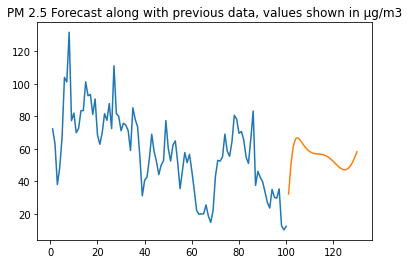

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1229:]))
plt.title('PM 2.5 Forecast along with previous data, values shown in μg/m3')
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('PM2.5/Forecast_along_previous_data.png')

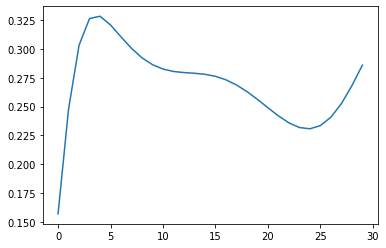

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1329:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

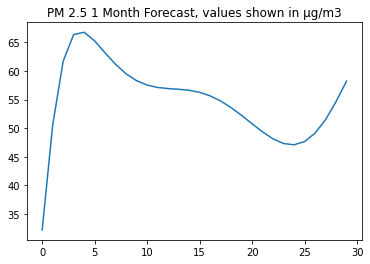

In [ ]:
#1month forecast
plt.title('PM 2.5 1 Month Forecast, values shown in μg/m3')
plt.plot(df3[1329:])
plt.savefig('PM2.5/1 monthh forecast.png')